In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file into a DataFrame with a different encoding
df = pd.read_csv('UpdatedDataset.csv', encoding='latin1')
df = df.drop(columns=['Country','Intend to apply for financial aid','Visa_Type_Category','Application Program','Race','Decisions Released Date'])
# Remove the time component and keep only the date
df['Record Created Date'] = pd.to_datetime(df['Record Created Date'])
df['Application Created Date'] = pd.to_datetime(df['Application Created Date'])
#df['Decisions Released Date'] = pd.to_datetime(df['Decisions Released Date'])
df['Rec_year'] = df['Record Created Date'].dt.year
df['App_year'] = df['Application Created Date'].dt.year
#df['Dec_year'] = df['Decisions Released Date'].dt.year
categorical_columns = ['Application Referral Source', 'Application Status', 'Program_Category', 'Region', 'GPA_Category', 'Race_Category', 'Application Start Term','Sex', 'Decision Reason', 'Visa Type New','Scholarship_Category']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Exclude date columns from conversion
cont_columns = ['Rec_year', 'Application Created Date', 'Age','Applications Registered in Colleague','App_year' ]
for col in df.columns:
  if col not in cont_columns:
     df[col] = df[col].astype(int)
program_category_columns = [col for col in df.columns if col.startswith('Program_Category_')]
print(program_category_columns)
df = df.drop(columns=['Unnamed: 0'])

/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_9815/839394167.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Record Created Date'] = pd.to_datetime(df['Record Created Date'])
/var/folders/gw/1hbycv6d5hdbrwt0xn0wt2600000gn/T/ipykernel_9815/839394167.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Application Created Date'] = pd.to_datetime(df['Application Created Date'])


['Program_Category_Accounting and Analytics - MS', 'Program_Category_Business Administration (Professional) - MBA', 'Program_Category_Business Analytics - MSBA', 'Program_Category_Certificates', 'Program_Category_Finance - MSF', 'Program_Category_Other MBA', 'Program_Category_Sport and Entertainment Management - MBA']


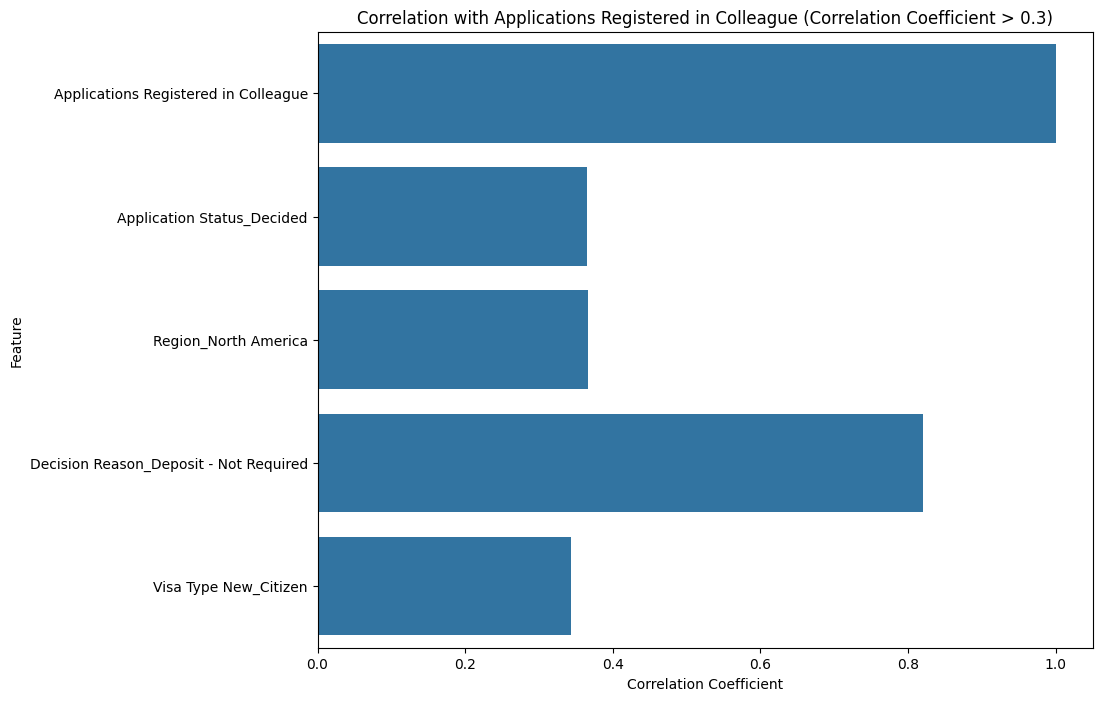

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_with_target = df.corr()['Applications Registered in Colleague']
# Filter variables with correlation coefficient greater than 0.3
filtered_correlation = correlation_with_target[correlation_with_target > 0.3]

# Plot the filtered correlation
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_correlation.values, y=filtered_correlation.index)
plt.title('Correlation with Applications Registered in Colleague (Correlation Coefficient > 0.3)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

In [42]:
correlation_matrix =df[cont_columns].corr()
correlation_matrix


,Rec_year,Application Created Date,Age,Applications Registered in Colleague,App_year
Rec_year,1.000000,0.939240,-0.250356,-0.168293,0.952565
Application Created Date,0.939240,1.000000,-0.240907,-0.151622,0.981641
Age,-0.250356,-0.240907,1.000000,0.145764,-0.239771
Applications Registered in Colleague,-0.168293,-0.151622,0.145764,1.000000,-0.151822
App_year,0.952565,0.981641,-0.239771,-0.151822,1.000000


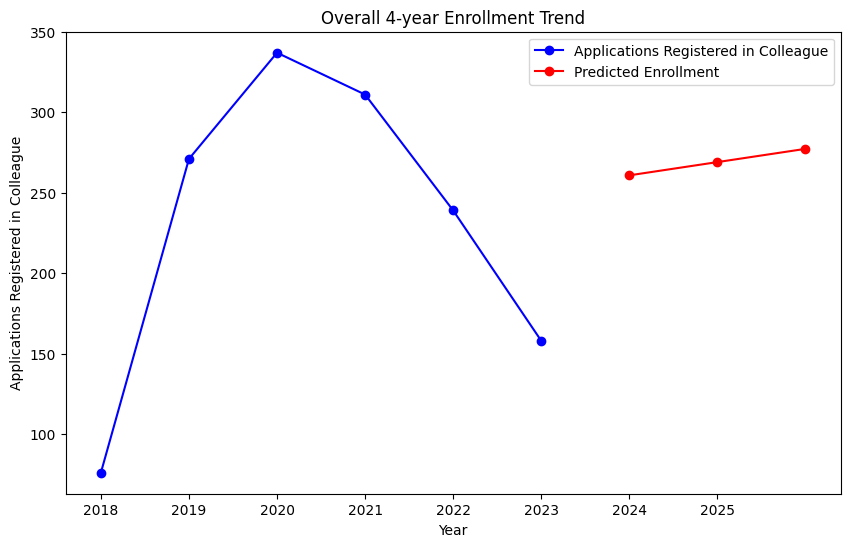

Mean Absolute Error (MAE): 66.49523809523816
Root Mean Squared Error (RMSE): 76.68989769300305


In [127]:

# 4-year enrollment trend
target_variable='Applications Registered in Colleague'
filtered_df = df[df['Rec_year'] <= 2023]
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('Overall 4-year Enrollment Trend')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
from sklearn.linear_model import LinearRegression

X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

#Question 2: What do you predict the next two years to look like?

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025])

plt.legend()  # Show legend
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years


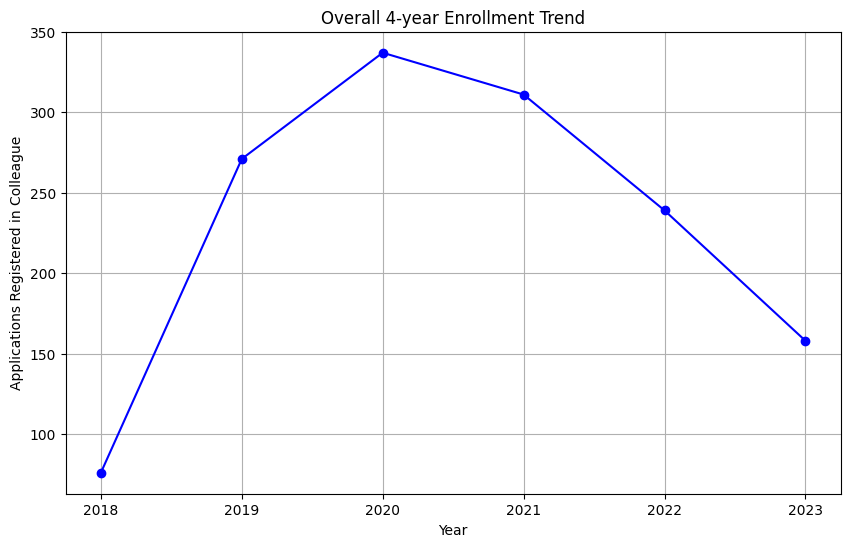

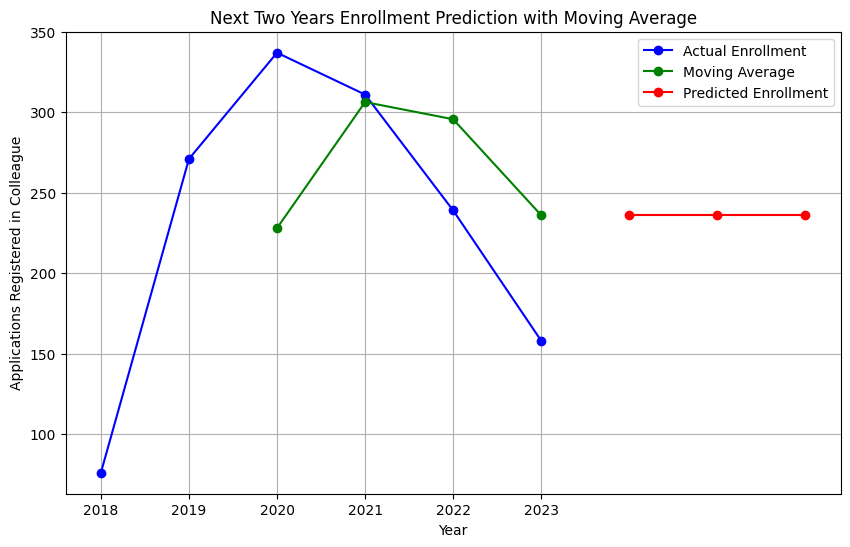

Mean Absolute Error (MAE): 40.5
Root Mean Squared Error (RMSE): 55.19510847892229


In [151]:
# Calculate the moving average

# 4-year enrollment trend
target_variable='Applications Registered in Colleague'
filtered_df = df[df['Rec_year'] <= 2023]
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('Overall 4-year Enrollment Trend')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
from sklearn.linear_model import LinearRegression

X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

window_size = 3  # You can adjust the window size as needed
moving_average = enrollment_trend.rolling(window=window_size).mean()

# Predict the next two years using the moving average
next_two_years = pd.Series([moving_average.iloc[-1]] * 3, index=[2024, 2025, 2026])

# Plot the predicted values
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b', label='Actual Enrollment')
moving_average.plot(marker='o', color='g', label='Moving Average')
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')

plt.title('Next Two Years Enrollment Prediction with Moving Average')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)
plt.legend()
plt.show()

# Calculate MAE and RMSE
actual_enrollment_last_two_years = enrollment_trend.tail(2)
predicted_enrollment_next_two_years = next_two_years.loc[2024:2025]
mae = mean_absolute_error(actual_enrollment_last_two_years, predicted_enrollment_next_two_years)
rmse = np.sqrt(mean_squared_error(actual_enrollment_last_two_years, predicted_enrollment_next_two_years))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


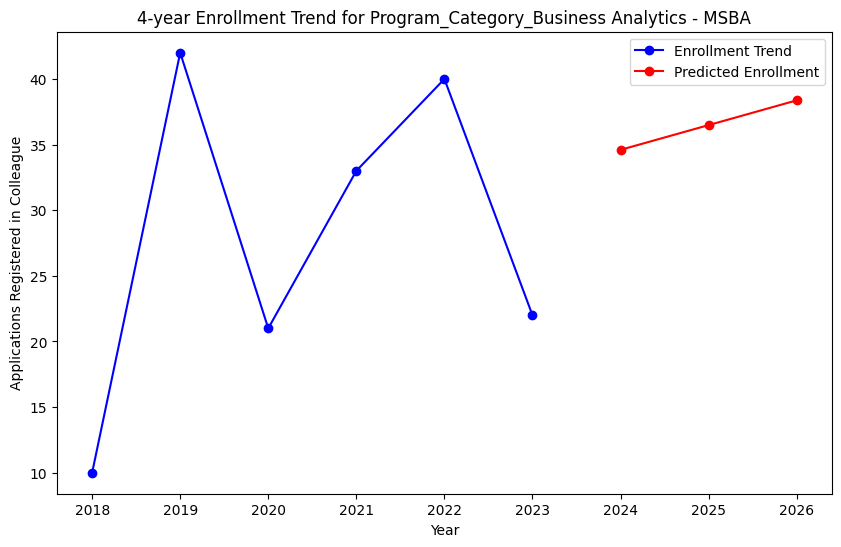

Mean Absolute Error (MAE): 7.16190476190468
Root Mean Squared Error (RMSE): 9.71140013164955


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[(df['Program_Category_Business Analytics - MSBA'] == 1) & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b', label='Enrollment Trend')  # Plot enrollment trend
plt.title('4-year Enrollment Trend for Program_Category_Business Analytics - MSBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)




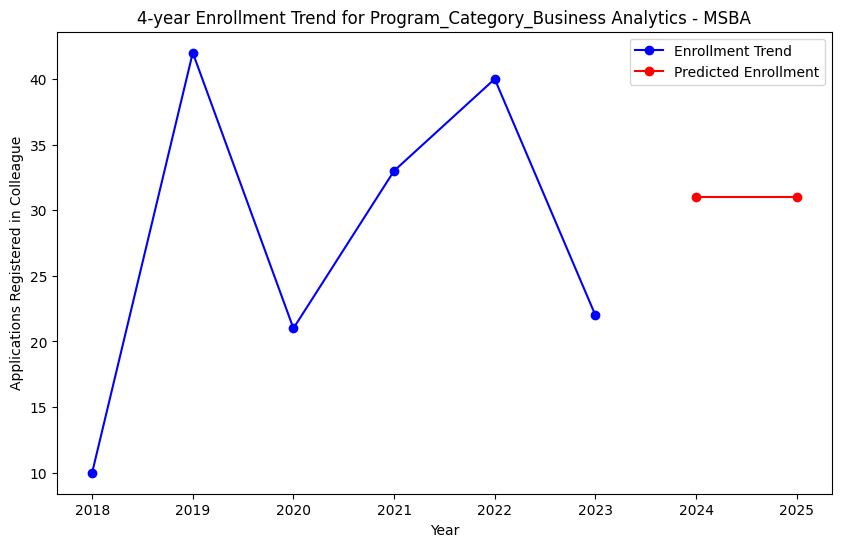

Mean Absolute Error (MAE): 7.16190476190468
Root Mean Squared Error (RMSE): 9.71140013164955


In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data based on dummy column 'x'
filtered_df = df[(df['Program_Category_Business Analytics - MSBA'] == 1) & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b', label='Enrollment Trend')  # Plot enrollment trend
plt.title('4-year Enrollment Trend for Program_Category_Business Analytics - MSBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Calculate the moving average
window_size = 2  # Adjust as needed
moving_average = enrollment_trend.rolling(window=window_size).mean()

# Predict the next two years using the last observed value of the moving average
last_observed_value = moving_average.iloc[-1]
next_two_years_moving_avg = pd.Series([last_observed_value] * 2, index=[2024, 2025])
next_two_years_moving_avg.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values

# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025])

plt.legend()  # Show legend
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)



Predicted Enrollment for the Next Two Years:
2024    10.071429
2025    11.428571
dtype: float64


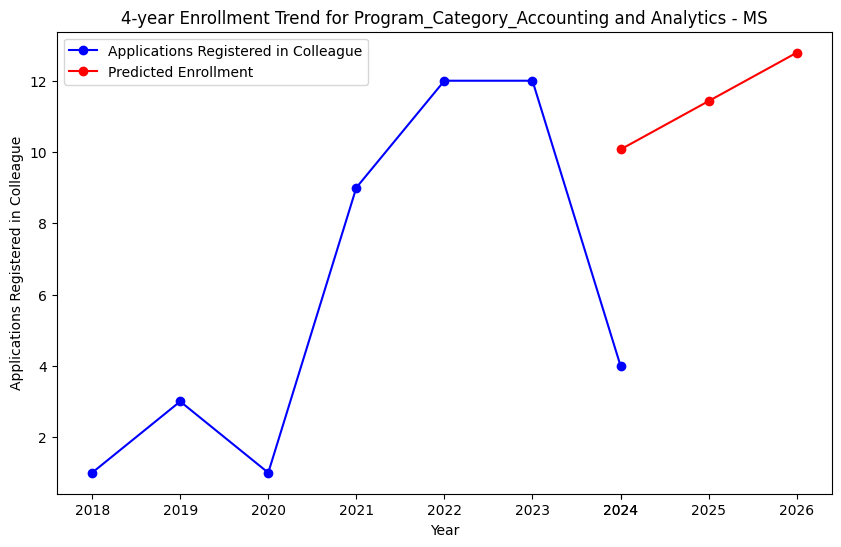

Mean Absolute Error (MAE): 3.76190476190474
Root Mean Squared Error (RMSE): 5.20367478735161


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Accounting and Analytics - MS'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Accounting and Analytics - MS')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)
# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)

Predicted Enrollment for the Next Two Years:
2024    17.892857
2025    12.428571
dtype: float64


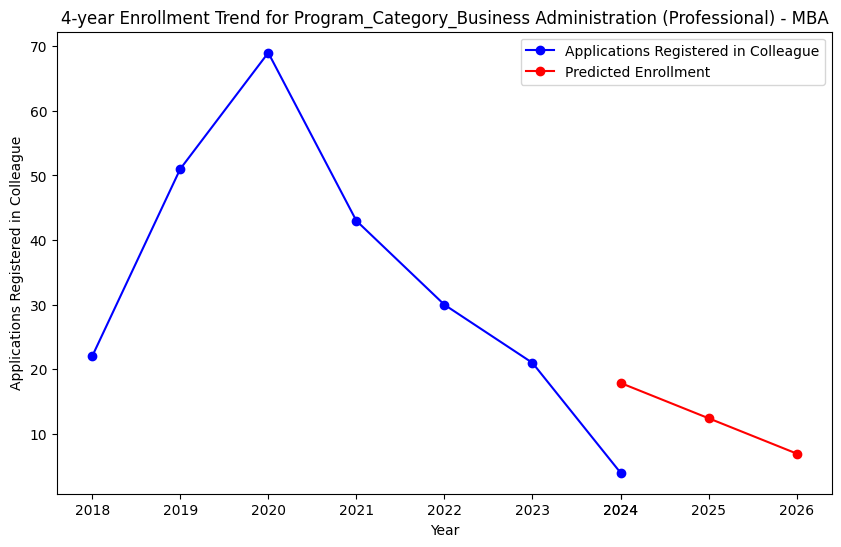

Mean Absolute Error (MAE): 7.880952380952901
Root Mean Squared Error (RMSE): 8.733828593736511


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Business Administration (Professional) - MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Business Administration (Professional) - MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)
# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)

Predicted Enrollment for the Next Two Years:
2024    13.214286
2025    10.571429
dtype: float64


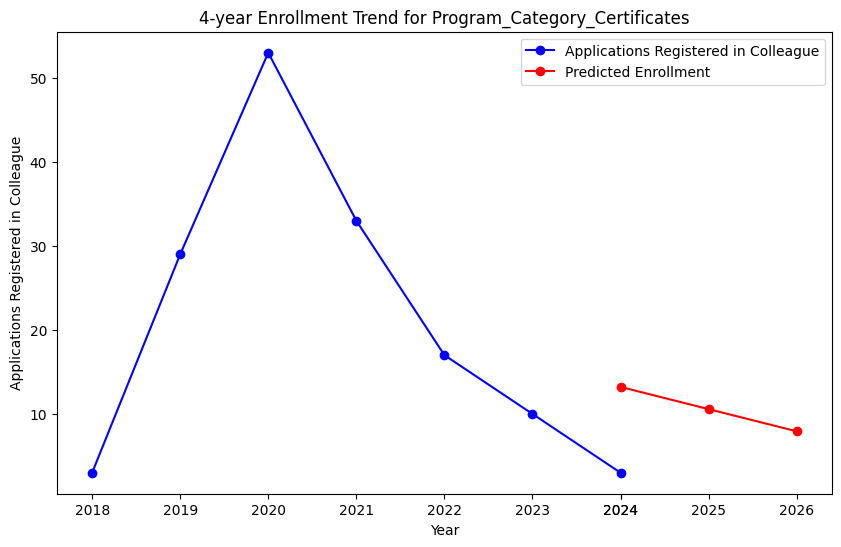

Mean Absolute Error (MAE): 3.095238095237922
Root Mean Squared Error (RMSE): 3.603192084426986


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Certificates'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Certificates')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)

# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025]]), index=[2024, 2025])
print("Predicted Enrollment for the Next Two Years:")
print(next_two_years)
# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)

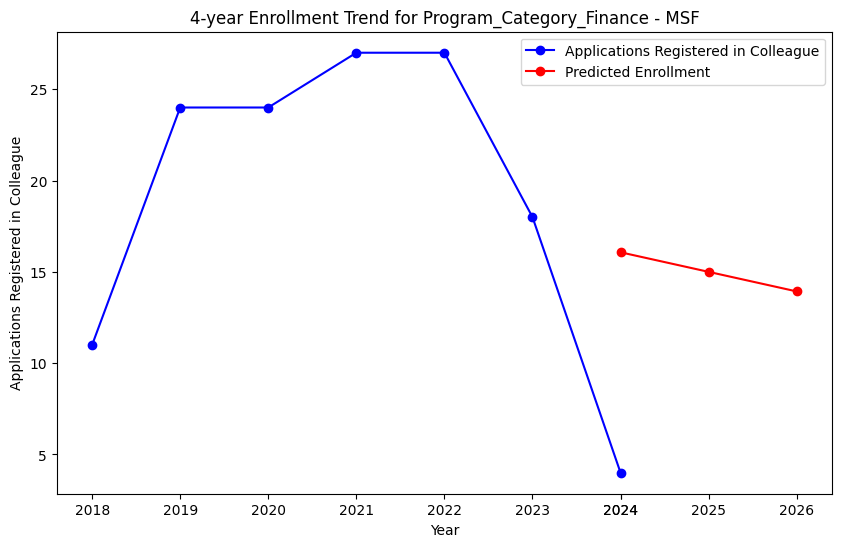

Mean Absolute Error (MAE): 7.952380952380888
Root Mean Squared Error (RMSE): 8.698854408898317


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Finance - MSF'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby(filtered_df['Rec_year'])[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Finance - MSF')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)


# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)

# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)

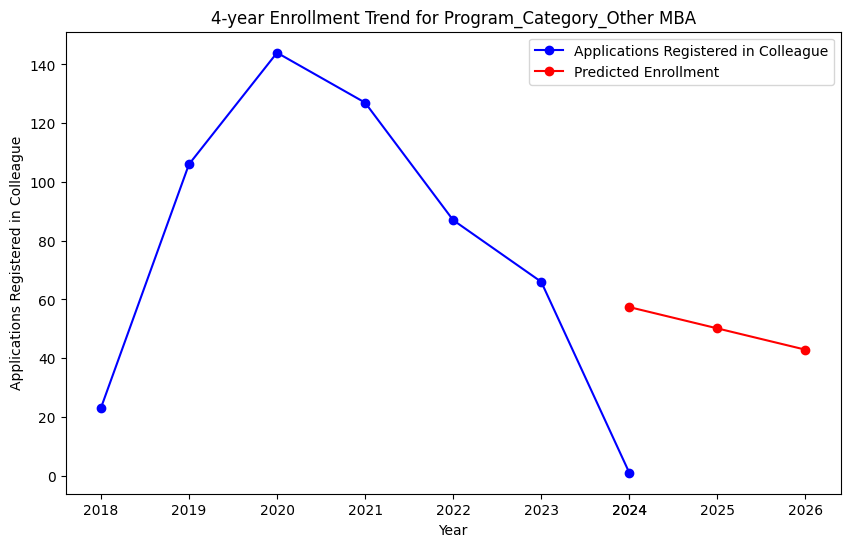

Mean Absolute Error (MAE): 29.119047619047706
Root Mean Squared Error (RMSE): 31.000233156902443


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Other MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby(filtered_df['Rec_year'])[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Other MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)


# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)


# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)

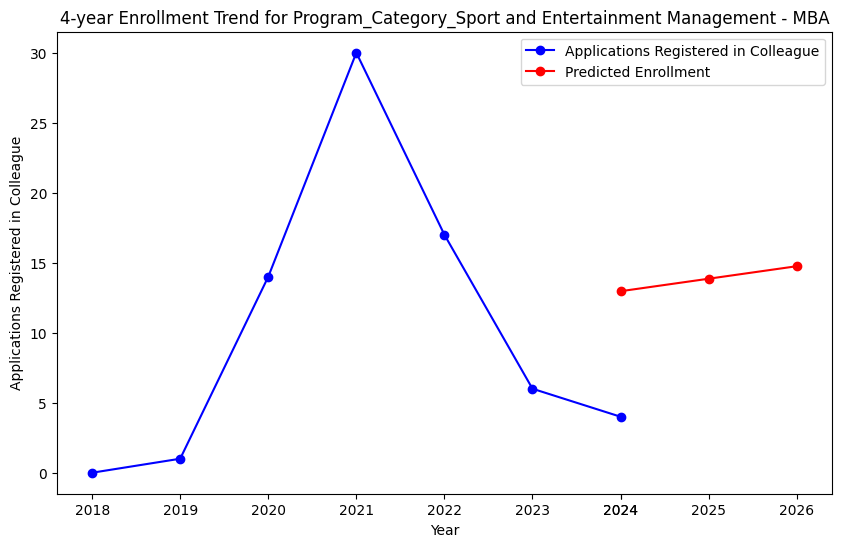

Mean Absolute Error (MAE): 7.547619047619037
Root Mean Squared Error (RMSE): 8.032936027660732


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter data based on dummy column 'x'
filtered_df = df[df['Program_Category_Sport and Entertainment Management - MBA'] == 1 & (df['Rec_year'] <= 2023)]

# Define the target variable
target_variable = 'Applications Registered in Colleague'

# 4-year enrollment trend
enrollment_trend = filtered_df.groupby('Rec_year')[target_variable].sum()
plt.figure(figsize=(10, 6))
enrollment_trend.plot(marker='o', color='b')
plt.title('4-year Enrollment Trend for Program_Category_Sport and Entertainment Management - MBA')
plt.xlabel('Year')
plt.ylabel('Applications Registered in Colleague')
plt.xticks(enrollment_trend.index)
plt.grid(True)


# Prediction for the next two years (using a simple linear trend model)
X = enrollment_trend.index.values.reshape(-1, 1)
y = enrollment_trend.values

model = LinearRegression()
model.fit(X, y)


# Predict the next two years
next_two_years = pd.Series(model.predict([[2024], [2025],[2026]]), index=[2024, 2025,2026])
next_two_years.plot(marker='o', color='r', label='Predicted Enrollment')  # Plot predicted values
# Add years of prediction to the x-axis ticks
plt.xticks(list(enrollment_trend.index) + [2024, 2025, 2026])

plt.legend()  # Show legend
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual enrollment values for the last two years
actual_enrollment = enrollment_trend.tail(3)

# Predicted enrollment values for the next two years using linear regression
predicted_enrollment = next_two_years

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_enrollment, predicted_enrollment)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_enrollment, predicted_enrollment))
print("Root Mean Squared Error (RMSE):", rmse)


In [39]:
# Question 4: What are the current student profiles of students most likely to matriculate by program?
# Student profiles by program
program_profiles = {}
program_columns = [col for col in df.columns if col.startswith('Program_Category_')]

for program_col in program_columns:
    program_name = program_col.split('_')[-1]
    mean_profile = df.groupby(program_col).mean()[target_variable]
    program_profiles[program_name] = mean_profile.loc[1]  # Assuming 1 represents presence in the program

# Define relevant columns including demographic information, academic performance, and application status
relevant_columns = ['Age']
relevant_columns2 = ['Age']
relevant_columns += [col for col in df.columns if col.startswith('Race_') or col.startswith('Sex_') or col.startswith('Visa Type New_')or col.startswith('Region_')  or col.startswith('GPA_Category_')]

# Group by program and calculate the proportion of each category for relevant columns
program_characteristics = {}
for program_col in program_columns:
    program_name = program_col.split('_')[-1]
    program_data = df[df[program_col] == 1][relevant_columns].mean()  # Select rows where the program is present
    program_data1 = df[df[program_col] == 1][relevant_columns2].mean()
    max_race_category = program_data.filter(like='Race_Category_').idxmax().split('_')[-1]
    max_sex_category = program_data.filter(like='Sex_').idxmax().split('_')[-1]
    max_visa_type_category = program_data.filter(like='Visa Type New_').idxmax().split('_')[-1]
    max_Region_category = program_data.filter(like='Region_').idxmax().split('_')[-1]
    max_gpa_category = program_data.filter(like='GPA_Category_').idxmax().split('_')[-1]
    program_characteristics[program_name] = {
        'Characteristics': program_data1,
        'Max Race Category': max_race_category,
        'Max Sex Category': max_sex_category,
        'Max Visa Type Category': max_visa_type_category,
        'Max Region Category': max_Region_category,
        'MAX gpa category': max_gpa_category
    }

# Print characteristics of students most likely to matriculate by program
for program, data in program_characteristics.items():
    print(f"Program: {program}")
    print("Characteristics:")
    print(data['Characteristics'])
    print(f"Race Category: {data['Max Race Category']}")
    print(f"Sex Category: {data['Max Sex Category']}")
    print(f"Visa Type Category: {data['Max Visa Type Category']}")
    print(f"Resident of: {data['Max Region Category']}")
    print(f"GPA: {data['MAX gpa category']}")
    print()


Program: Accounting and Analytics - MS
Characteristics:
Age    29.237037
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: Other
GPA: equal to or greater than 3

Program: Business Administration (Professional) - MBA
Characteristics:
Age    30.979508
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: North America
GPA: equal to or greater than 3

Program: Business Analytics - MSBA
Characteristics:
Age    28.302284
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: Other
GPA: equal to or greater than 3

Program: Certificates
Characteristics:
Age    32.877761
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: Citizen
Resident of: North America
GPA: equal to or greater than 3

Program: Finance - MSF
Characteristics:
Age    28.040119
dtype: float64
Race Category: Asian
Sex Category: M
Visa Type Category: F-1  Student
Resident of: 

In [99]:
# Question 3: Which factors correlate (+/-) with whether an applicant will matriculate (other than country they apply from), Program wise? Logistic model
program_category_columns = df.filter(regex='^Program_Category_', axis=1).columns

# Loop through each program category
for category_column in program_category_columns:
    category_name = category_column.replace('Program_Category_', '')
    print("Program category:", category_name)
    
    # Filter data for the current program category
    df_category = df[df[category_column] == 1 & df['Rec_year']]
    
    # Define X (independent variables) and y (target variable)
    X = df_category.drop(['Applications Registered in Colleague', 'Application Created Date','Record Created Date', 'App_year'], axis=1)  # Exclude non-predictive columns
    y = df_category['Applications Registered in Colleague']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

# Print precision, recall, and accuracy
    print("Precision:", precision)
    print("Recall:", recall)
    coefficients = model.coef_[0]
    significant_coefficients = []
    for feature, coef in zip(X.columns, coefficients):
     if abs(coef) > 0.7:
            # Determine the sign of the coefficient
            sign = '+' if coef > 0 else '-'
            # Append the tuple (feature, coefficient, sign) to the list
            significant_coefficients.append((feature, sign))
    
    print("Factors that correlate with whether an apllicant will matriculate:",significant_coefficients)

   

Program category: Accounting and Analytics - MS
Accuracy: 0.9844810863239574
Precision: 0.9745762711864406
Recall: 0.8984375
Factors that correlate with whether an apllicant will matriculate: [('Rec_year', '+'), ('Application Status_Awaiting Submission', '-'), ('Application Status_Decided', '+'), ('Application Start Term_Fall 2019', '+'), ('Application Start Term_Fall 2020', '+'), ('Application Start Term_Fall 2021', '+'), ('Application Start Term_Fall 2022', '+'), ('Application Start Term_Fall 2023', '+'), ('Application Start Term_Fall 2024', '-'), ('Application Start Term_Summer 2020', '+'), ('Application Start Term_Summer 2023', '+'), ('Application Start Term_Winter 2021', '+'), ('Application Start Term_Winter 2023', '+'), ('Decision Reason_Admit Declined', '-'), ('Decision Reason_Deposit - Not Required', '+'), ('Decision Reason_Deposit Paid', '+'), ('Decision Reason_Pending', '-'), ('Decision Reason_Update Term - Post Decision', '-')]
Program category: Business Administration (Prof

In [145]:
#Question 3: Which factors correlate (+/-) with whether an applicant will matriculate (other than country they apply from), Program wise? KNN Classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

program_category_columns = df.filter(regex='^Program_Category_', axis=1).columns

# Loop through each program category
for category_column in program_category_columns:
    category_name = category_column.replace('Program_Category_', '')
    print("Program category:", category_name)
    
    # Filter data for the current program category
    df_category = df[df[category_column] == 1 & df['Rec_year']]
    
    # Define X (independent variables) and y (target variable)
    X = df_category.drop(['Applications Registered in Colleague', 'Application Created Date','Record Created Date', 'App_year'], axis=1)  # Exclude non-predictive columns
    y = df_category['Applications Registered in Colleague']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
    knn_classifier.fit(X_train, y_train)

    # Predict using the trained KNN classifier
    y_pred = knn_classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)


Program category: Accounting and Analytics - MS
Accuracy: 0.9524733268671193
Precision: 0.8264462809917356
Recall: 0.78125
Program category: Business Administration (Professional) - MBA
Accuracy: 0.9540117416829745
Precision: 0.8623853211009175
Recall: 0.746031746031746
Program category: Business Analytics - MSBA
Accuracy: 0.9635108481262328
Precision: 0.9083969465648855
Recall: 0.8263888888888888
Program category: Certificates
Accuracy: 0.9516288252714709
Precision: 0.8809523809523809
Recall: 0.7655172413793103
Program category: Finance - MSF
Accuracy: 0.9636184857423795
Precision: 0.9105691056910569
Recall: 0.8115942028985508
Program category: Other MBA
Accuracy: 0.9519607843137254
Precision: 0.8581560283687943
Recall: 0.8066666666666666
Program category: Sport and Entertainment Management - MBA
Accuracy: 0.9652844744455159
Precision: 0.8738738738738738
Recall: 0.8151260504201681


Program category: Accounting and Analytics - MS
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.348779
1                                 Rec_year    0.077560
0                                      Age    0.056543
27                    Region_North America    0.035422
7        Application Referral Source_Other    0.033416
60                 Decision Reason_Pending    0.033008
16              Application Status_Decided    0.030866
81                   Visa Type New_Citizen    0.030372
44          Decision Reason_Admit Declined    0.030144
15  Application Status_Awaiting Submission    0.025956


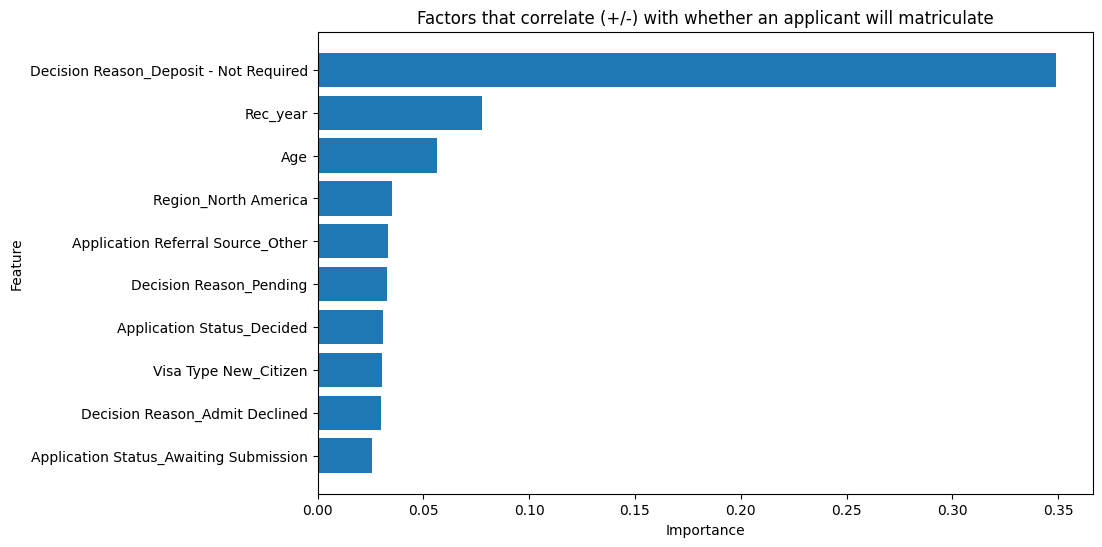

Accuracy: 0.9709020368574199
Precision: 0.9016393442622951
Recall: 0.859375
Program category: Business Administration (Professional) - MBA
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.401466
1                                 Rec_year    0.063072
0                                      Age    0.052109
27                    Region_North America    0.034988
60                 Decision Reason_Pending    0.034780
16              Application Status_Decided    0.030295
81                   Visa Type New_Citizen    0.028642
7        Application Referral Source_Other    0.026205
44          Decision Reason_Admit Declined    0.025579
15  Application Status_Awaiting Submission    0.021967


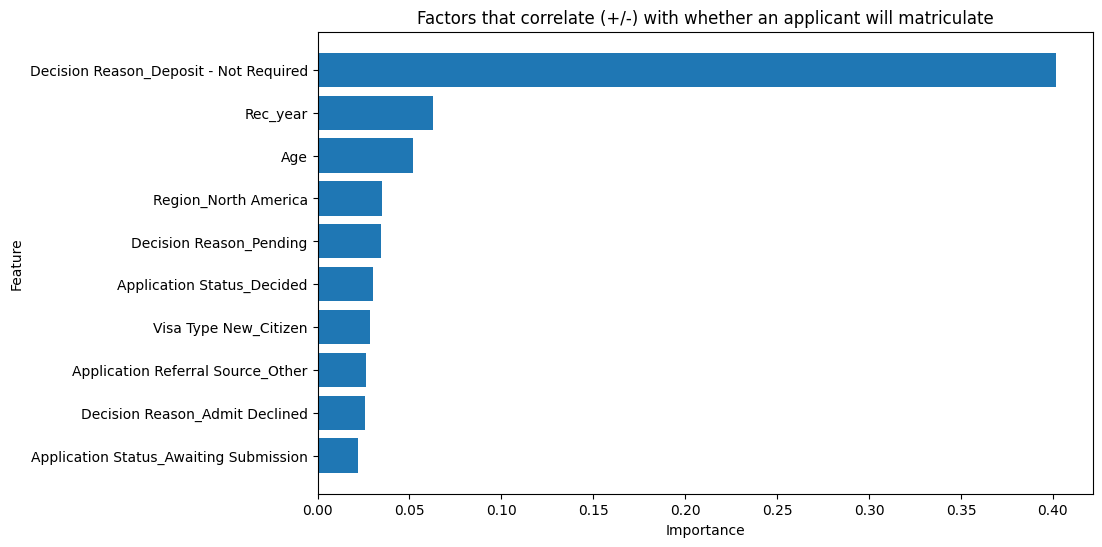

Accuracy: 0.9755381604696673
Precision: 0.9391304347826087
Recall: 0.8571428571428571
Program category: Business Analytics - MSBA
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.349136
1                                 Rec_year    0.074231
0                                      Age    0.054486
27                    Region_North America    0.036574
16              Application Status_Decided    0.035705
60                 Decision Reason_Pending    0.035211
44          Decision Reason_Admit Declined    0.034861
7        Application Referral Source_Other    0.031888
81                   Visa Type New_Citizen    0.031561
15  Application Status_Awaiting Submission    0.021439


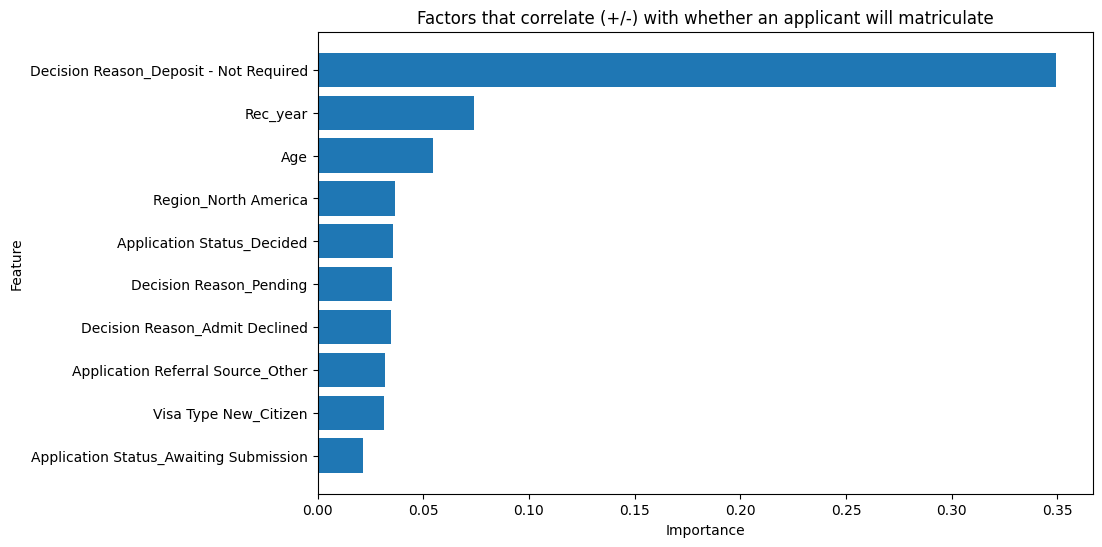

Accuracy: 0.9723865877712031
Precision: 0.9328358208955224
Recall: 0.8680555555555556
Program category: Certificates
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.348700
1                                 Rec_year    0.088102
0                                      Age    0.056684
81                   Visa Type New_Citizen    0.033155
16              Application Status_Decided    0.032251
60                 Decision Reason_Pending    0.031892
7        Application Referral Source_Other    0.031644
44          Decision Reason_Admit Declined    0.030961
27                    Region_North America    0.029210
15  Application Status_Awaiting Submission    0.022531


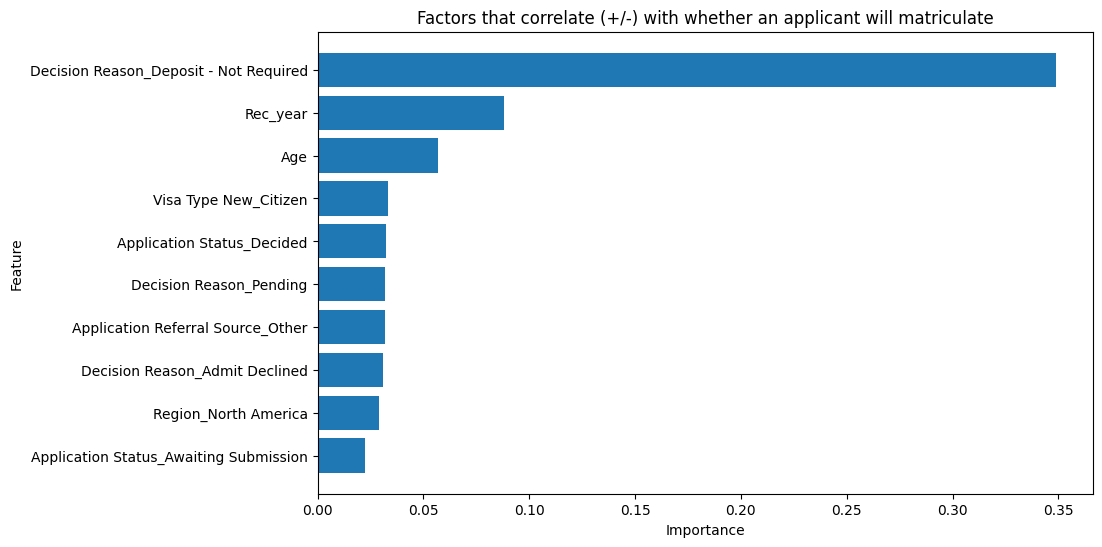

Accuracy: 0.9703849950641659
Precision: 0.9457364341085271
Recall: 0.8413793103448276
Program category: Finance - MSF
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.355329
1                                 Rec_year    0.066876
0                                      Age    0.055225
16              Application Status_Decided    0.041290
27                    Region_North America    0.040413
44          Decision Reason_Admit Declined    0.034335
7        Application Referral Source_Other    0.032791
60                 Decision Reason_Pending    0.029817
81                   Visa Type New_Citizen    0.026259
15  Application Status_Awaiting Submission    0.023069


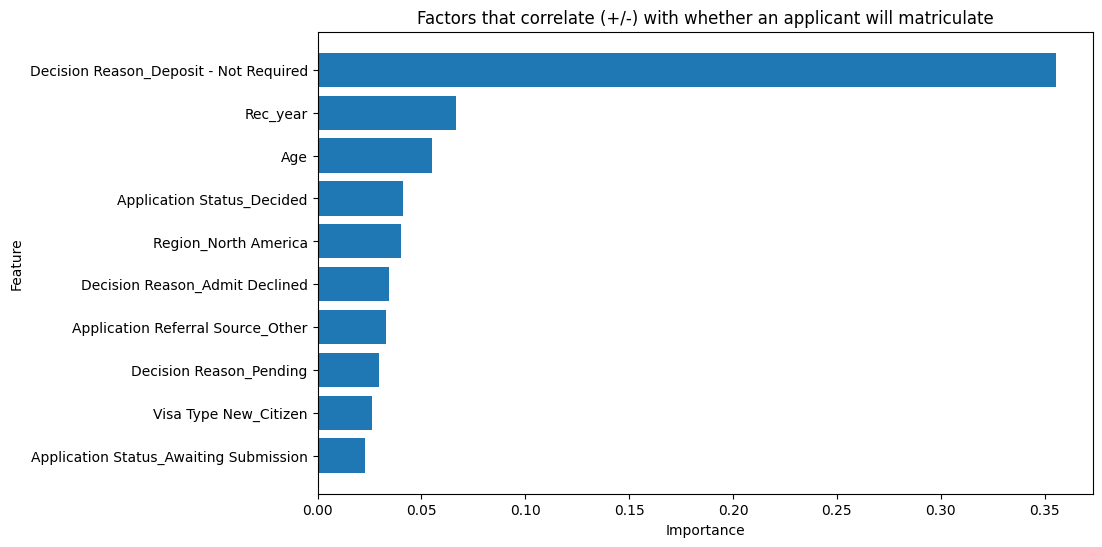

Accuracy: 0.9734513274336283
Precision: 0.9302325581395349
Recall: 0.8695652173913043
Program category: Other MBA
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.390124
1                                 Rec_year    0.058662
0                                      Age    0.051337
81                   Visa Type New_Citizen    0.039828
27                    Region_North America    0.034681
60                 Decision Reason_Pending    0.032788
44          Decision Reason_Admit Declined    0.028885
16              Application Status_Decided    0.027937
7        Application Referral Source_Other    0.025254
15  Application Status_Awaiting Submission    0.024798


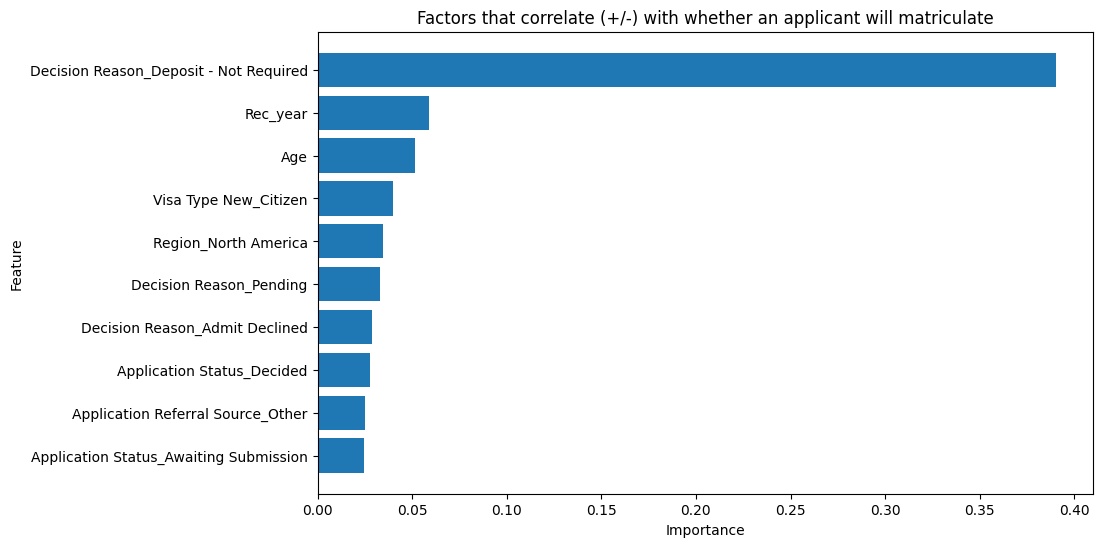

Accuracy: 0.9676470588235294
Precision: 0.927007299270073
Recall: 0.8466666666666667
Program category: Sport and Entertainment Management - MBA
Top Significant Predictors:
                                   Feature  Importance
56  Decision Reason_Deposit - Not Required    0.346896
1                                 Rec_year    0.070918
0                                      Age    0.057601
44          Decision Reason_Admit Declined    0.039100
27                    Region_North America    0.038730
60                 Decision Reason_Pending    0.037381
7        Application Referral Source_Other    0.033447
16              Application Status_Decided    0.032587
81                   Visa Type New_Citizen    0.028738
15  Application Status_Awaiting Submission    0.025132


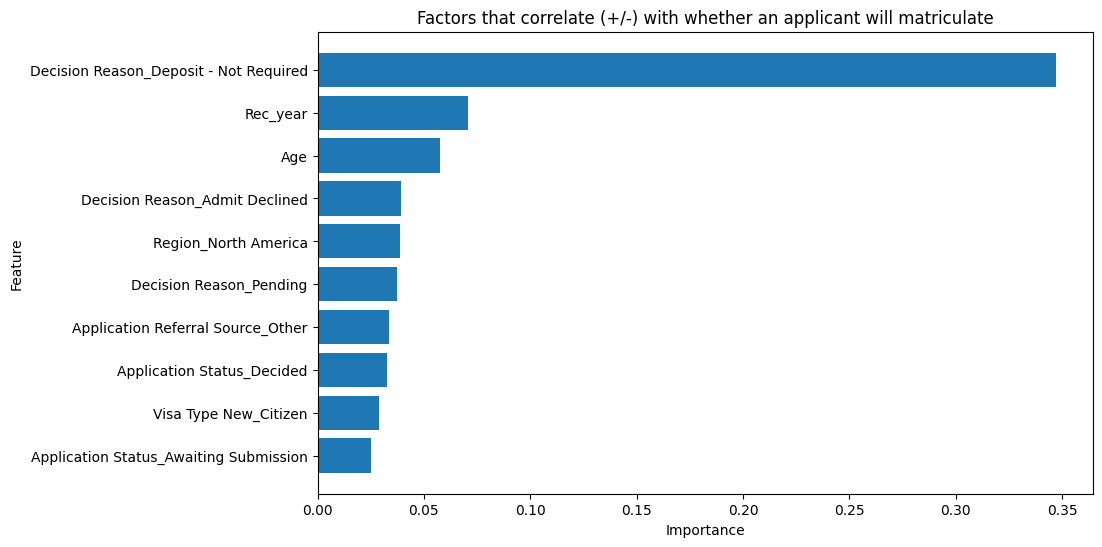

Accuracy: 0.970106075216972
Precision: 0.860655737704918
Recall: 0.8823529411764706


In [97]:
#Question 3: Which factors correlate (+/-) with whether an applicant will matriculate (other than country they apply from), Program wise? Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

program_category_columns = df.filter(regex='^Program_Category_', axis=1).columns

# Loop through each program category
for category_column in program_category_columns:
    category_name = category_column.replace('Program_Category_', '')
    print("Program category:", category_name)
    
    # Filter data for the current program category
    df_category = df[df[category_column] == 1 & df['Rec_year']]
    
    # Define X (independent variables) and y (target variable)
    X = df_category.drop(['Applications Registered in Colleague', 'Application Created Date','Record Created Date', 'App_year'], axis=1)  # Exclude non-predictive columns
    y = df_category['Applications Registered in Colleague']  # Target variable
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assuming 'X' and 'y' are your feature matrix and target variable
# Train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

# Extract feature importances
    feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print top significant predictors
    print("Top Significant Predictors:")
    print(importance_df.head(10))  # Adjust the number as needed

# Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Factors that correlate (+/-) with whether an applicant will matriculate')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
    plt.show()
    y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
    precision = precision_score(y_test, y_pred)

# Calculate recall
    recall = recall_score(y_test, y_pred)

# Print the metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)